# Question 1

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model

FTSE100 is the dependent variable and monthly House price returns is the independent variable.

# Extracting the House price data

In [2]:
house_price = pd.read_excel("monthly.xls")
house_price.rename(columns={"Unnamed: 0":"Dates"}, inplace=True)
house_price.head()

,Dates,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


In [3]:
house_1991_2016= house_price.iloc[:312]
house_1991_2016.head()

,Dates,Average House Price,INDEX Q1 1993=100,Seasonally Adjusted Index,Monthly % Change (SA),Year % Change,Latest 3 months on previous 3 months
0,1991-01-01,53051.721106,105.832511,107.127299,NaN,NaN,NaN
1,1991-02-01,53496.798746,106.720393,107.494996,0.003432,NaN,NaN
2,1991-03-01,52892.861606,105.515603,106.525649,-0.009018,NaN,NaN
3,1991-04-01,53677.435270,107.080744,107.126622,0.005642,NaN,NaN
4,1991-05-01,54385.726747,108.493710,107.266757,0.001308,NaN,NaN


# Extracting the FTSE100 index data

In [4]:
ftse = pd.read_excel("ftse.xls")
ftse.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1991-01-01,2143.500000,2182.100098,2052.300049,2170.300049,2170.300049,0
1,1991-02-01,2168.500000,2388.399902,2155.600098,2380.899902,2380.899902,0
2,1991-03-01,2374.899902,2527.100098,2368.399902,2456.500000,2456.500000,0
3,1991-04-01,2456.500000,2555.300049,2438.600098,2486.199951,2486.199951,0
4,1991-05-01,2487.399902,2554.899902,2444.600098,2499.500000,2499.500000,0


# Calculating monthly returns for both variables.

In [5]:
price_data = np.array(house_1991_2016["Average House Price"])
price_data[:5]

array([53051.72110631, 53496.7987463 , 52892.86160564, 53677.43527037,
       54385.72674684])

In [6]:
price_returns = []
for i in range(1,312):
    returns = (price_data[i] / price_data[i-1]) - 1
    price_returns.append(returns)
    
price_returns[:5]

[0.008389504255622793,
 -0.011289220192764016,
 0.014833261822261967,
 0.013195330084406987,
 0.013269075933395102]

In [7]:
closing_price = np.array(ftse["Adj Close"])
closing_price[:5]

array([2170.300049, 2380.899902, 2456.5     , 2486.199951, 2499.5     ])

In [8]:
ftse_returns = []
for i in range(1,312):
    returns = (closing_price[i] / closing_price[i-1]) - 1
    ftse_returns.append(returns)
    
ftse_returns[:5]

[0.09703720602920196,
 0.031752741027245346,
 0.012090352534093185,
 0.005349549216526306,
 -0.03388675775155037]

In [9]:
dates = ftse["Date"]
dates.head()

0   1991-01-01
1   1991-02-01
2   1991-03-01
3   1991-04-01
4   1991-05-01
Name: Date, dtype: datetime64[ns]

# Creating the regression model

In [10]:
df_price = pd.DataFrame(price_returns)
df_ftse = pd.DataFrame(ftse_returns)

In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(df_price, df_ftse)

In [12]:
price_new = pd.DataFrame([0.05])
ftse_predict = model.predict(price_new)
ftse_predict

array([[0.00936887]])

Text(0.5, 0, 'Date')

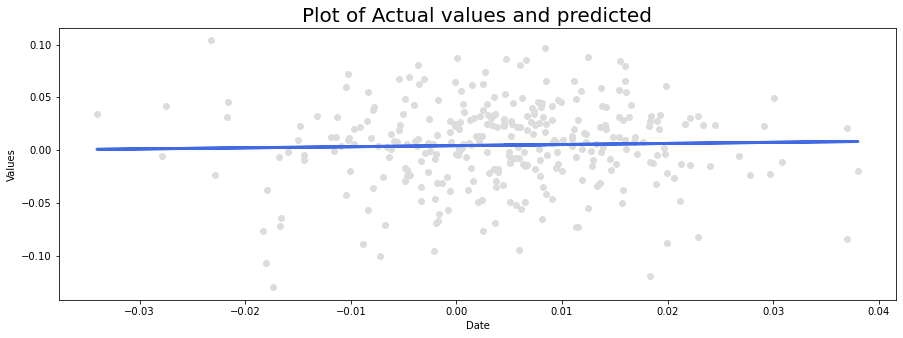

In [13]:
plt.figure(figsize=(15,5))
plt.scatter(price_returns,ftse_returns , color="gainsboro")
plt.plot(df_price, model.predict(df_price), color='royalblue', linewidth=3)
plt.title("Plot of Actual values and predicted", fontsize=20)
plt.ylabel("Values")
plt.xlabel("Date")

# Calculating the correlation coefficent

In [14]:
combined_data = pd.DataFrame({"Returns House Price":price_returns, "FTSE returns":ftse_returns})
combined_data.head()

,Returns House Price,FTSE returns
0,0.008390,0.097037
1,-0.011289,0.031753
2,0.014833,0.012090
3,0.013195,0.005350
4,0.013269,-0.033887


In [15]:
combined_data.corr()

,Returns House Price,FTSE returns
Returns House Price,1.000000,0.029719
FTSE returns,0.029719,1.000000


From the above calculated correlation we can deduce that there is a very weak relationship between house prices and FTSE100 index in the UK. 

Our null hypothesis is that there is no relationship between monthly house prices and FTSE100 index in the UK.

Our alternate hypothesis is that there is a relationship between monthly house prices and FTSE100 index in the UK.

In [16]:
ttest, p_value = stats.ttest_ind(a=ftse_returns, b=price_returns, equal_var=False)

In [17]:
p_value

0.9319576735840782

In [18]:
if p_value <= 0.05:
    print("We are rejecting the null hypothesis")
else:
    print("We are failing to reject the null hypothesis")

We are failing to reject the null hypothesis


As our p_value is greater than our significance level of 0.05 then we fail to reject the null hypothesis and therefore thereis no relationship between house prices and FTSE100 index in the UK. 

# Question 2

In [19]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import linear_model
from sklearn.metrics import accuracy_score

# Extracting the data

In [20]:
data = pd.read_csv("College.csv")
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [21]:
data.rename(columns={"Unnamed: 0":"Colleges"}, inplace=True)
data.head()

,Colleges,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


# Selecting the useful variables

In [22]:
data_columns = data[["Colleges","Apps", "Enroll", "Outstate", "Top10perc", "Top25perc", "Grad.Rate"]]
data_columns.head()

,Colleges,Apps,Enroll,Outstate,Top10perc,Top25perc,Grad.Rate
0,Abilene Christian University,1660,721,7440,23,52,60
1,Adelphi University,2186,512,12280,16,29,56
2,Adrian College,1428,336,11250,22,50,54
3,Agnes Scott College,417,137,12960,60,89,59
4,Alaska Pacific University,193,55,7560,16,44,15


# Calculating the correlation coefficients of the variables

In [23]:
corr = data_columns.corr()
corr

,Apps,Enroll,Outstate,Top10perc,Top25perc,Grad.Rate
Apps,1.000000,0.846822,0.050159,0.338834,0.351640,0.146755
Enroll,0.846822,1.000000,-0.155477,0.181294,0.226745,-0.022341
Outstate,0.050159,-0.155477,1.000000,0.562331,0.489394,0.571290
Top10perc,0.338834,0.181294,0.562331,1.000000,0.891995,0.494989
Top25perc,0.351640,0.226745,0.489394,0.891995,1.000000,0.477281
Grad.Rate,0.146755,-0.022341,0.571290,0.494989,0.477281,1.000000


# Building the regression model

In [24]:
x_data = data_columns.drop(["Grad.Rate", "Colleges"], axis = 1)
y_data = data_columns[["Grad.Rate"]]

In [25]:
lm = linear_model.LinearRegression()
model = lm.fit(x_data, y_data)

In [26]:
y_predict = model.predict(x_data)

# Finding the variables that are useful in predicting graduation rate.

In [27]:
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    the_best_features = []
    bic = []
    p_values = []
    included = list(initial_list)
    best_before = 0
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        new_bic = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
            new_bic.loc[new_column] = model.bic
        
        if best_before == 0 :
            best_before =  new_bic.min()
        best_bic = new_bic.min()
        if best_bic <= best_before :
            best_before = best_bic
            best_feature = new_bic.idxmin()
            included.append(best_feature)
            
            the_best_features += [best_feature]
            bic += [best_bic] 
            p_values += [new_pval.min()]
            changed=True
        if not changed:
            break

    return the_best_features, bic, p_values

In [28]:
forward_regression(x_data, y_data,
                       0.05,
                       verbose=False)

<ipython-input-27-ffde2517c043>:13: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=excluded)
<ipython-input-27-ffde2517c043>:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_bic = pd.Series(index=excluded)


(['Outstate', 'Top25perc'],
 [6329.339476057561, 6274.3329824422635],
 [1.6289269593116737e-68, 4.6950332119235745e-15])

# Finding the accuracy of the model using all features

In [29]:
accuracy = accuracy_score(y_data, np.round(y_predict), normalize=True)
accuracy

0.039897039897039896

# Finding the accuracy of the model using only useful variables

In [30]:
x_useful = data_columns[["Outstate", "Top25perc"]]
x_useful

,Outstate,Top25perc
0,7440,52
1,12280,29
2,11250,50
3,12960,89
4,7560,44
...,...,...
772,6797,26
773,11520,47
774,6900,61
775,19840,99


In [31]:
linear_model = linear_model.LinearRegression()
regression_model = linear_model.fit(x_useful, y_data)

In [32]:
y_useful_predict = regression_model.predict(x_useful)

In [33]:
accuracy_useful = accuracy_score(y_data, np.round(y_useful_predict))
accuracy_useful

0.04247104247104247

# Finding the graduation rate value predicted by the most accurate model given predictors corresponding to CMU.

In [34]:
cmu_value = data[data['Colleges']=='Carnegie Mellon University'].index.values
graduation_rate = y_useful_predict[cmu_value]
graduation_rate

array([[87.09352366]])

# Question 3

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In this study we want to analyze if there is a relationship between the number of cars that are registered in Great Britain and annual number of accidents.

The data source is Department for Transport and Driver and Vehicle Licensing Agency of Great Britain

# List of assumptions

- Number of accidents increased overtime from 1979 to 2020.

- A steady increase in the number of new registered cars overtime.

- As the number of new registered cars increased the number of accidents also increased.

# Extracting data about accidents

In [36]:
accidents = pd.read_excel("ras10013.xlsx", skiprows=5)
accidents.head()

,Year,Fatal,Serious (unadjusted),Serious (adjusted)1,FSA (Fatal/Serious) (unadjusted),FSA (Fatal/Serious) (adjusted)1,Slight (unadjusted),Slight (adjusted)1,Total
0,1979,5824.0,66927.0,..,72751.0,..,182216.0,..,254967
1,1980,5506.0,65714.0,..,71220.0,..,179738.0,..,250958
2,1981,5355.0,64980.0,..,70335.0,..,177941.0,..,248276
3,1982,5450.0,66143.0,..,71593.0,..,184414.0,..,256007
4,1983,5027.0,60021.0,..,65048.0,..,177828.0,..,242876


In [37]:
accidents = accidents.iloc[:41]
accidents.head()

,Year,Fatal,Serious (unadjusted),Serious (adjusted)1,FSA (Fatal/Serious) (unadjusted),FSA (Fatal/Serious) (adjusted)1,Slight (unadjusted),Slight (adjusted)1,Total
0,1979,5824.0,66927.0,..,72751.0,..,182216.0,..,254967
1,1980,5506.0,65714.0,..,71220.0,..,179738.0,..,250958
2,1981,5355.0,64980.0,..,70335.0,..,177941.0,..,248276
3,1982,5450.0,66143.0,..,71593.0,..,184414.0,..,256007
4,1983,5027.0,60021.0,..,65048.0,..,177828.0,..,242876


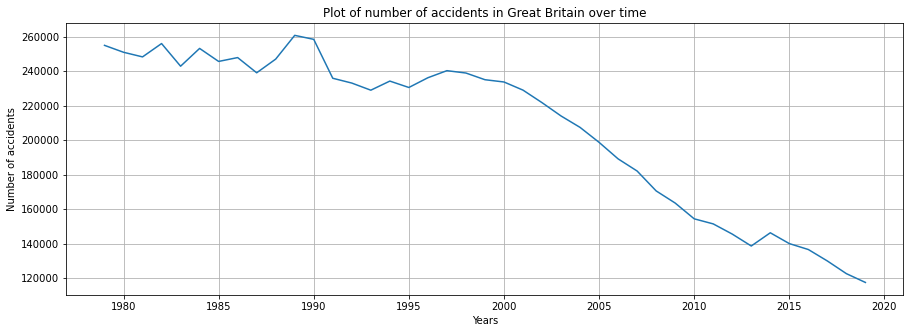

In [38]:
plt.figure(figsize=(15,5))
plt.plot(accidents["Year"], accidents["Total"])
plt.xlabel("Years")
plt.ylabel("Number of accidents")
plt.title("Plot of number of accidents in Great Britain over time")
plt.grid(True)
plt.show()

From the plot above we can observe that the number of accidents in Great Britain had a downward trend from the year 1980 to the year 2020.

# Loading the the data of new registered cars in Great Britain

In [39]:
cars_df = pd.read_excel("veh0150.xlsx", skiprows=9)
cars_df.head()

,Date,Cars,Motorcycles,Light Goods Vehicles,Heavy Goods Vehicles,Buses & coaches,Other vehicles,Total,Year-on-year change in total vehicles 2,All ULEVs,ULEV cars,"Plug-in Grant Eligible Cars and Vans 4,5","Plug-in Non Grant Eligible Cars and Vans 4,5"
0,2001,2585.98,180.46,274.039,52.46,10.554,34.236,3137.73,,NaN,NaN,NaN,NaN
1,2002,2682.13,165.79,283.568,48.676,12.298,36.924,3229.39,2.92109,NaN,NaN,NaN,NaN
2,2003,2646.06,160.893,317.859,53.173,13.68,40.236,3231.9,0.0777237,NaN,NaN,NaN,NaN
3,2004,2599.08,137.124,340.955,53.117,13.233,41.929,3185.44,-1.43755,NaN,NaN,NaN,NaN
4,2005,2443.45,135.635,329.723,56.864,13.137,42.56,3021.37,-5.15041,NaN,NaN,NaN,NaN


In [40]:
cars_dt = cars_df[0:19]
cars_dt.head()

,Date,Cars,Motorcycles,Light Goods Vehicles,Heavy Goods Vehicles,Buses & coaches,Other vehicles,Total,Year-on-year change in total vehicles 2,All ULEVs,ULEV cars,"Plug-in Grant Eligible Cars and Vans 4,5","Plug-in Non Grant Eligible Cars and Vans 4,5"
0,2001,2585.98,180.46,274.039,52.46,10.554,34.236,3137.73,,NaN,NaN,NaN,NaN
1,2002,2682.13,165.79,283.568,48.676,12.298,36.924,3229.39,2.92109,NaN,NaN,NaN,NaN
2,2003,2646.06,160.893,317.859,53.173,13.68,40.236,3231.9,0.0777237,NaN,NaN,NaN,NaN
3,2004,2599.08,137.124,340.955,53.117,13.233,41.929,3185.44,-1.43755,NaN,NaN,NaN,NaN
4,2005,2443.45,135.635,329.723,56.864,13.137,42.56,3021.37,-5.15041,NaN,NaN,NaN,NaN


In [41]:
cars_total = cars_dt["Total"]
dates = cars_dt["Date"]

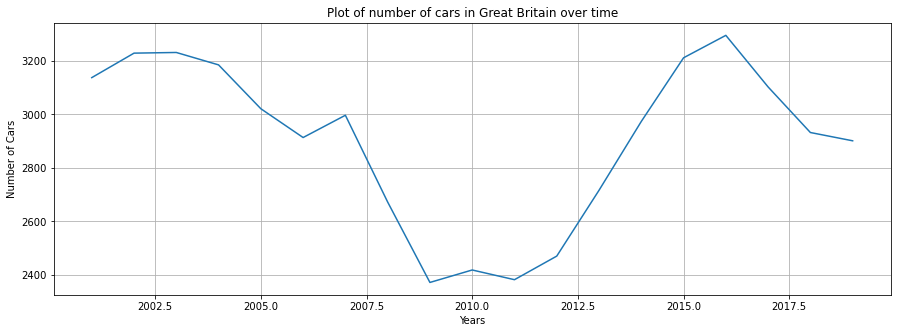

In [42]:
plt.figure(figsize=(15,5))
plt.plot(cars_dt["Date"], cars_total)
plt.xlabel("Years")
plt.ylabel("Number of Cars")
plt.title("Plot of number of cars in Great Britain over time")
plt.grid(True)
plt.show()

From the graph we can observe that the number of new registered cars decreased dramatically from the year 2001 to the year 2010, however it had a positive trend from 2010 until it reached its peak in the year 2015.

# Comparing the two variables

In [43]:
data_accidents = accidents[22:41]
data_accidents.head()

,Year,Fatal,Serious (unadjusted),Serious (adjusted)1,FSA (Fatal/Serious) (unadjusted),FSA (Fatal/Serious) (adjusted)1,Slight (unadjusted),Slight (adjusted)1,Total
22,2001,3176.0,31588.0,..,34764.0,..,194250.0,..,229014
23,2002,3124.0,30521.0,..,33645.0,..,188106.0,..,221751
24,2003,3247.0,28913.0,..,32160.0,..,181870.0,..,214030
25,2004,2978.0,26748.0,42726.2,29726.0,45704.2,177684.0,161706,207410
26,2005,2913.0,25029.0,40356.6,27942.0,43269.6,170793.0,155465,198735


In [44]:
accidents_array = np.array(data_accidents.Total)
accidents_array

array([229014, 221751, 214030, 207410, 198735, 189161, 182115, 170591,
       163554, 154414, 151474, 145571, 138660, 146322, 140056, 136621,
       129982, 122635, 117536], dtype=object)

In [45]:
cars_array = np.array(cars_dt.Total)
cars_array

array([3137.731, 3229.387, 3231.897, 3185.437, 3021.374, 2913.578,
       2996.914, 2672.185, 2371.213, 2417.842, 2381.516, 2469.79, 2716.12,
       2973.739, 3211.975, 3295.957, 3102.887, 2932.332, 2901.33],
      dtype=object)

In [46]:
combined_data = pd.DataFrame({"Accidents":accidents_array, "Cars":cars_array})
combined_data.head()

,Accidents,Cars
0,229014,3137.73
1,221751,3229.39
2,214030,3231.9
3,207410,3185.44
4,198735,3021.37


In [47]:
combined_data = combined_data.astype(float)

In [48]:
combined_data["Accidents"].corr(combined_data["Cars"])

0.3288471615555784

From the correlation figure we got of 0.3288 we can deduce that there is actually a weak relationship between the number of new registered cars and the number of accidents in Great Britain.

# Building linear regression model for dates and number of new registered cars

In [49]:
df_dates = pd.DataFrame(dates)
df_accidents = pd.DataFrame(accidents_array)
df_cars = pd.DataFrame(cars_array)

In [50]:
lin_model = linear_model.LinearRegression()
the_model = lin_model.fit(df_dates, df_cars)

In [51]:
date_new = pd.DataFrame([2021])
cars_predict = the_model.predict(date_new)
cars_predict

array([[2810.94159825]])

From the above figure we can see that in the year 2021 there will be approximately 2810 cars in great Britain.

# Building linear regression model for accidents and number of registered cars

In [52]:
lm = linear_model.LinearRegression()
model = lm.fit(df_cars, df_accidents)

In [53]:
cars_new = pd.DataFrame([2810.94159825])
accidents_predict = model.predict(cars_new)
accidents_predict

array([[162878.20631224]])

From the above figure we can predict that there will be 162,878 accidents in Great Britain in the year 2021.

# Findings

- The number of accidents has a negative trend from the year 1979 to the year 2020
- There is a weak relationship between the number of new registered cars and the number of accidents
- There will be 2810 cars in great Britain in the year 2021
- There will be approximately 162,878 accidents in Great Britain in the year 2021.

# Question 4

In [54]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.utils.validation import check_array
import datetime as dt

# Extracting the Israeli unemployment data

In [55]:
data = quandl.get("ODA/ISR_LUR", authtoken="Aii73vy1c3CR5xabTJQt",start_date= "1980-01-01", end_date='2013-12-31')
data.head()

,Value
Date,
1980-12-31,4.780
1981-12-31,5.115
1982-12-31,5.048
1983-12-31,4.562
1984-12-31,5.893


In [56]:
data.reset_index(inplace=True)
data.head()

,Date,Value
0,1980-12-31,4.780
1,1981-12-31,5.115
2,1982-12-31,5.048
3,1983-12-31,4.562
4,1984-12-31,5.893


# Building the regression Model

In [57]:
date = data['Date']
date = pd.to_datetime(date)

In [58]:
date = date.dt.year
date[:5]

0    1980
1    1981
2    1982
3    1983
4    1984
Name: Date, dtype: int64

In [59]:
Y_test = data["Value"]
Y_test = pd.DataFrame(Y_test)

In [60]:
X_test = date
X_test = pd.DataFrame(X_test)

In [61]:
lm = linear_model.LinearRegression()
model = lm.fit(X_test, Y_test)

Text(0.5, 0, 'Date')

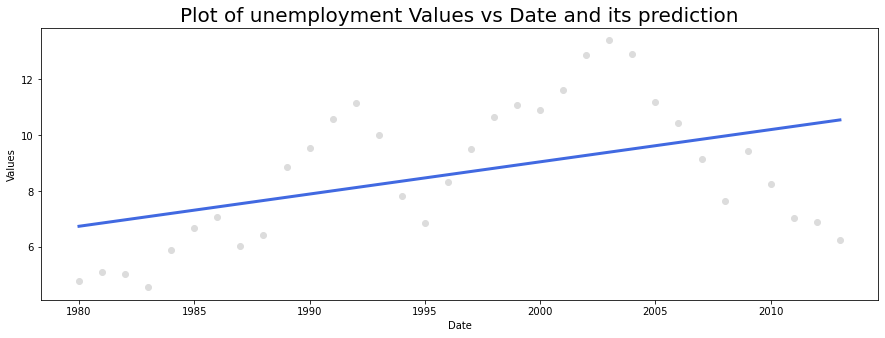

In [62]:
plt.figure(figsize=(15,5))
plt.scatter(date,Y_test , color="gainsboro")
plt.plot(X_test, model.predict(X_test), color='royalblue', linewidth=3)
plt.title("Plot of unemployment Values vs Date and its prediction", fontsize=20)
plt.ylabel("Values")
plt.xlabel("Date")

# Predicting the unemployment rate by 2020

In [63]:
X_new = [2020]
X_new = pd.DataFrame(X_new)
Y_predict = model.predict(X_new)
Y_predict

array([[11.36117464]])

# Evaluationg the performance of the model using MAPE

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [65]:
y_pred = model.predict(X_test)

In [66]:
mean_absolute_percentage_error(Y_test,y_pred)

23.71081555955634